<a href="https://colab.research.google.com/github/dkanh6/Machine_Learning_Examples/blob/main/Probability_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script will show how to generate data that follows various statistics distributions, plot their associated PDF's, and provide insight into their governing equations and the parameters that influence its behavior.

In [33]:
import numpy as np
import scipy.stats as st
import scipy.signal as signal
import matplotlib.pyplot as plt

# Bernoulli Distributions
 Is the simplest discrete distribution and is a special case of the binomial distribution where a single trial is conduced (n=1). It has only two possible outcomes, often termed as "success" and "failure", with probabilities $ p $ and $ q = 1- p $, respectively.  The probability mass function (PMF) of a bernoulli distribution is defined by
 $$
P(X = k) = p^k (1-p)^{1-k}
$$


 for k in {0,1} where $ p $ is the probability of success (the random variable X equals 1), and $ q $ is the probability of failure (the random variable X equals 0).





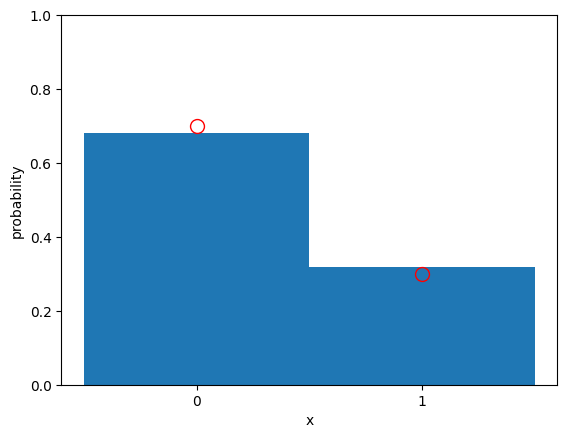

In [34]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Create object for Bernoulli Distribution
dist_bernoulli = st.bernoulli

# Specify the probability of success for the Bernoulli distribution
p = 0.3

# Generate 1000 random samples from the Bernoulli distribution
x = dist_bernoulli.rvs(p, size=1000)

#Possible values in a Bernoulli distribution are 0 and 1
xs = np.array([0, 1])
# Evaluate the PMF at 0 and 1
pmf_bernoulli = dist_bernoulli.pmf(xs, p)

# Plot histogram of the relative frequency of 0's and 1's
plt.figure()
plt.hist(x, bins=xs.size, range=(xs[0]-.5, xs[-1]+.5), density=True)

# Plot the PMF with red circles to visualize the probability of 0's and 1's
plt.plot(xs, pmf_bernoulli, 'ro', markersize=10, markerfacecolor='None')

# Set the ticks on the x-axis to correspond to 0 and 1
plt.xticks(xs)
# Set the y-axis limits to range from 0 to 1
plt.ylim([0, 1])
# Label the x-axis as 'x'
plt.xlabel('x')
# Label the y-axis as 'probability'
plt.ylabel('probability')
# Display the plot
plt.show()

# Uniform Distribution

The Uniform distribution is a continuous distribution that is defined over an interval \( [a, b] \). It is characterized by a constant probability density function, indicating that all outcomes in the interval \( [a, b] \) are equally likely.

### Probability Density Function (PDF)

The probability density function for a Uniform distribution is given by:

$$
f(x) =
\begin{cases}
\frac{1}{b - a} & \text{for } a \le x \le b, \\
0 & \text{otherwise}.
\end{cases}
$$

This function represents the "flat" nature of the distribution, showing that each value is equally likely.

## Cumulative Distribution Function (CDF)

The cumulative distribution function, which gives the probability that a random variable \( X \) will take a value less than or equal to \( x \), is:

$$
F(x) =
\begin{cases}
0 & \text{for } x < a, \\
\frac{x - a}{b - a} & \text{for } a \le x \le b, \\
1 & \text{for } x > b.
\end{cases}
$$

## Moment Generating Function (MGF)

The moment generating function for the Uniform distribution is:

$$
M_X(t) =
\begin{cases}
1 & \text{for } t = 0, \\
\frac{e^{tb} - e^{ta}}{t(b - a)} & \text{for } t \neq 0.
\end{cases}
$$

The MGF is a way of characterizing the distribution that is particularly useful for finding moments (like the mean and variance).

## Mean

The mean of the Uniform distribution is the midpoint of the interval \( [a, b] \):

$$
\mu = \frac{a + b}{2}
$$

## Variance

The variance measures the spread of the distribution and is given by:

$$
\sigma^2 = \frac{(b - a)^2}{12}
$$




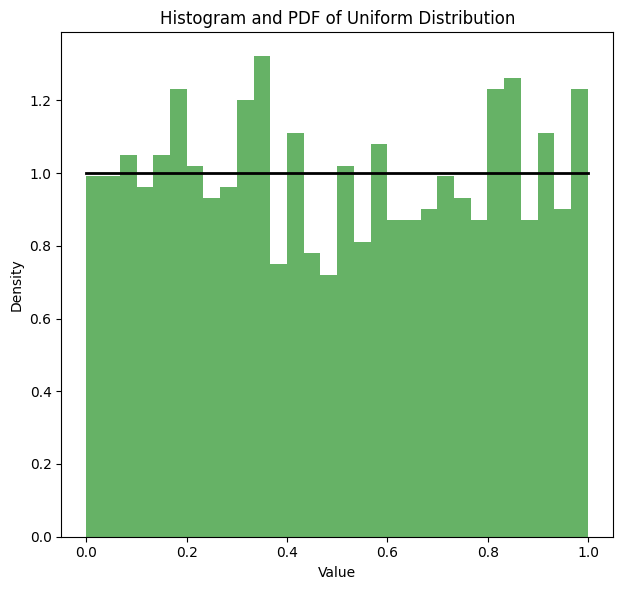

The MGF value for t=0.5 is: 1.2974425414002564


In [35]:
# Parameters for the uniform distribution
a = 0  # lower bound
b = 1  # upper bound

# Generate random samples from the uniform distribution
samples = np.random.uniform(a, b, size=1000)

# Calculate the PDF values for the range of x values
x_values = np.linspace(a, b, 1000)
pdf_values = st.uniform.pdf(x_values, loc=a, scale=b-a)

# Plotting the histogram of the samples
plt.figure(figsize=(12, 6))

# Plot the histogram of the samples
plt.subplot(1, 2, 1)
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')
plt.plot(x_values, pdf_values, 'k-', linewidth=2)
plt.title('Histogram and PDF of Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Moment Generating Function (MGF) for a specific t value (not equal to 0)
t = 0.5  # t is not equal to 0
mgf_value = (np.exp(t*b) - np.exp(t*a)) / (t * (b - a))

# Print the calculated MGF value
print(f"The MGF value for t={t} is: {mgf_value}")



# Poisson Distribution
Poisson Distributions usually arise in connection with a Poisson process, which involves observing discreete events in a continuous "interval: of time, length, or space. The random Variable $ X $ is the number of ocurrences of the event within an interval of $ s $ units and the paramter $ λ $ is the average number of occurrences of the event in qestion per measurement unit. For the distribution, we use the paramters $ k = \lambda*s $.

## Density Function

The probability mass function (PMF) or density function for a Poisson distribution is given by:

$$
f(k;\lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

where \( \lambda \) is the average rate of occurrence per interval, and \( k \) is the number of occurrences, which can take values 0, 1, 2, ...

## Cumulative Distribution Function (CDF)

The cumulative distribution function is not as simple to write in a closed form and is typically calculated using tables or computational functions.

## Moment Generating Function (MGF)

The moment generating function for the Poisson distribution is given by:

$$
M_X(t) = \exp(\lambda(e^t - 1))
$$

where \( t \) is the parameter at which the MGF is evaluated.

## Mean

The mean of the Poisson distribution is equal to \( \lambda \):

$$
\mu = k
$$

Where  $ k = \lambda*s $.

## Variance

The variance of the Poisson distribution is also equal to \( \lambda \):

$$
\sigma^2 = \lambda
$$

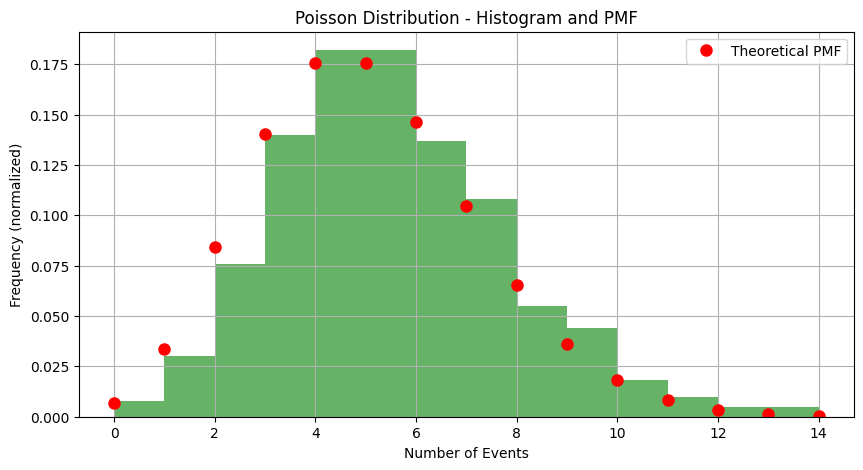

In [36]:
from scipy.stats import poisson

# Set the average rate (lambda)
lambda_ = 5

# Generate random samples from the Poisson distribution
samples = np.random.poisson(lambda_, 1000)

# Calculate the PMF for the range of k values
k_values = np.arange(0, max(samples) + 1)
pmf_values = poisson.pmf(k_values, lambda_)

# Plotting the histogram of the samples
plt.figure(figsize=(10, 5))
plt.hist(samples, bins=range(min(samples), max(samples) + 1), density=True, alpha=0.6, color='g')

# Plot the PMF over the histogram
plt.plot(k_values, pmf_values, 'ro', markersize=8, label='Theoretical PMF')

plt.title('Poisson Distribution - Histogram and PMF')
plt.xlabel('Number of Events')
plt.ylabel('Frequency (normalized)')
plt.legend()
plt.grid(True)
plt.show()


# Gaussian (Normal) Distribution

The Gaussian distribution, commonly known as the Normal distribution, is a continuous probability distribution that is symmetrical around its mean, characterized by its bell-shaped curve.

## Probability Density Function (PDF)

The probability density function (PDF) of the Gaussian distribution is given by:

$$
f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

where:
- \( x \) is the variable,
- \( \mu \) is the mean or expectation of the distribution (also the median and mode),
- \( \sigma \) is the standard deviation,
- \( \sigma^2 \) is the variance.

## Cumulative Distribution Function (CDF)

The CDF of the Gaussian distribution is used to determine the probability that a normally distributed random variable will be less than or equal to a certain value. It is defined as:

$$
F(x; \mu, \sigma^2) = \frac{1}{2} \left[1 + \text{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right]
$$

where \( \text{erf} \) is the error function.

## Moment Generating Function (MGF)

The MGF of the Gaussian distribution is:

$$
M(t) = \exp\left(\mu t + \frac{\sigma^2 t^2}{2}\right)
$$

## Mean

The mean of the Gaussian distribution is:

$$
\mu = E[X]
$$

## Variance

The variance of the Gaussian distribution is:

$$
\sigma^2 = \text{Var}(X)
$$




In [37]:
dist_norm = st.norm # create an object for Gaussian distribution
mu, sigma = 4, 5 # specify the mean and standard deviation of a Gaussian distribution
x = dist_norm.rvs(loc=mu, scale=sigma, size=5000) # generate 8000 random samples from the Gausiian distribution




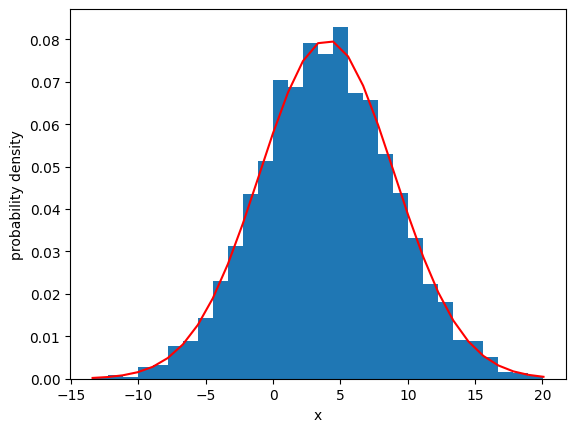

In [38]:
plt.figure()
# plot histogram
_ , xs, _ = plt.hist(x, bins=30, density=True) # return edges of bins in xs

# plot the probability density function (pdf)
pdf_norm = dist_norm.pdf(xs, loc=mu, scale=sigma)
plt.plot(xs, pdf_norm, 'r')

plt.xlabel('x')
plt.ylabel('probability density')
plt.show()

# Log-Normal Distribution

The Log-Normal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed. It is applicable to describe the distribution of a variable whose values are positively skewed and bounded at zero, commonly used in the financial and economic sectors, among others.

## Probability Density Function (PDF)

The probability density function of the Log-Normal distribution is given by:

$$
f(x; \mu, \sigma^2) = \frac{1}{x\sigma\sqrt{2\pi}} \exp\left(-\frac{(\ln(x) - \mu)^2}{2\sigma^2}\right)
$$

for \( x > 0 \), where \( \mu \) and \( \sigma \) are the mean and standard deviation of the variable's natural logarithm.

## Cumulative Distribution Function (CDF)

The cumulative distribution function for the Log-Normal distribution is:

$$
F(x; \mu, \sigma^2) = \frac{1}{2} + \frac{1}{2} \text{erf}\left(\frac{\ln(x) - \mu}{\sigma\sqrt{2}}\right)
$$

where \( \text{erf} \) is the error function.

## Characteristics

The Log-Normal distribution is characterized by its mean and variance, which are not as straightforward as for the Normal distribution.

### Mean (Expected Value)

$$
E[X] = \exp\left(\mu + \frac{\sigma^2}{2}\right)
$$

### Variance

$$
\text{Var}(X) = \left(\exp(\sigma^2) - 1\right) \exp(2\mu + \sigma^2)
$$

The shape of the Log-Normal distribution is highly dependent on the value of \( \sigma^2 \), with larger values leading to greater skew and variability.


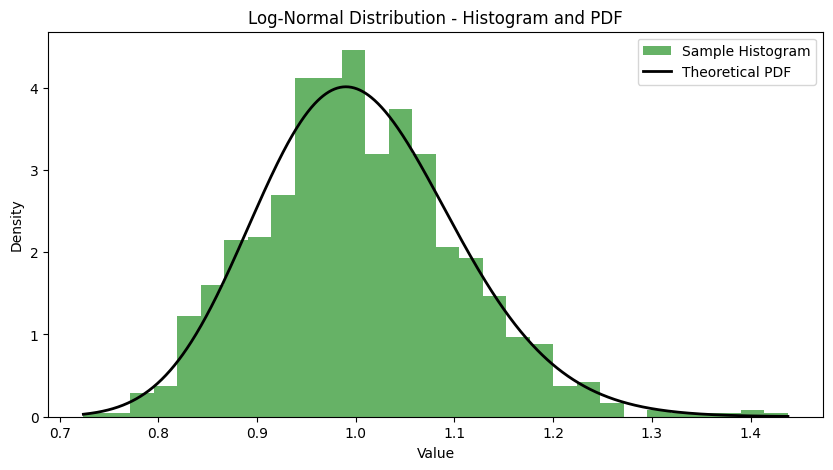

In [39]:
# Parameters for the log-normal distribution, these are the mean and standard deviation
# of the underlying normal distribution for the logarithm of the variable.
mu = 0.0  # mean of the logarithm of the variable
sigma = 0.1  # standard deviation of the logarithm of the variable

# Generate random samples from the log-normal distribution
samples = np.random.lognormal(mu, sigma, 1000)

# Calculate the PDF for the range of x values
x_values = np.linspace(min(samples), max(samples), 1000)
pdf_values = st.lognorm.pdf(x_values, s=sigma, scale=np.exp(mu))

# Plotting
plt.figure(figsize=(10, 5))

# Plot the histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Sample Histogram')

# Plot the PDF
plt.plot(x_values, pdf_values, 'k-', linewidth=2, label='Theoretical PDF')

plt.title('Log-Normal Distribution - Histogram and PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()



# Noise in Signals

In this section, we will explore three types of noise commonly found in signal processing: white noise, Brownian noise (also known as random walk noise), and pink noise. We will look at their definitions, characteristics, and the equations governing them.

## White Noise

White noise is a type of noise that is characterized by a flat frequency spectrum when plotted against power. In other words, white noise has equal intensity at different frequencies, giving it a constant power spectral density.

### Characteristics of White Noise:
- Contains all frequencies in equal proportion, similar to how white light consists of all visible frequencies.
- It is uncorrelated in time.

### Equation for Power Spectral Density of White Noise:
The power spectral density \( S(f) \) of white noise is constant across the frequency spectrum:

$$
S(f) = N_0 / 2
$$

where \( N_0 \) represents the noise power density.

## Brownian Noise (Random Walk Noise)

Brownian noise, or random walk noise, is the signal obtained from the cumulative sum of random steps. It is named after the random motion observed in particles suspended in fluid, known as Brownian motion.

### Characteristics of Brownian Noise:
- The value of the signal at any time depends on the sum of all previous values, which makes it a non-stationary process.

### Equation for Brownian Noise:
A Brownian noise \( S_n \) can be modeled as the cumulative sum of a sequence of independent random variables \( X_i \):

$$
S_n = \sum_{i=1}^{n} X_i
$$

where \( X_i \) are random steps with mean 0.

## Pink Noise

Pink noise, also known as \( 1/f \) noise, is a signal with a frequency spectrum that is inversely proportional to its frequency. It is sometimes found in natural systems and is intermediate between white noise and Brownian noise.

### Characteristics of Pink Noise:
- It has a higher energy at lower frequencies, inversely proportional to the frequency.

### Equation for Power Spectral Density of Pink Noise:
The power spectral density \( S(f) \) of pink noise decreases with frequency:

$$
S(f) \propto \frac{1}{f}
$$


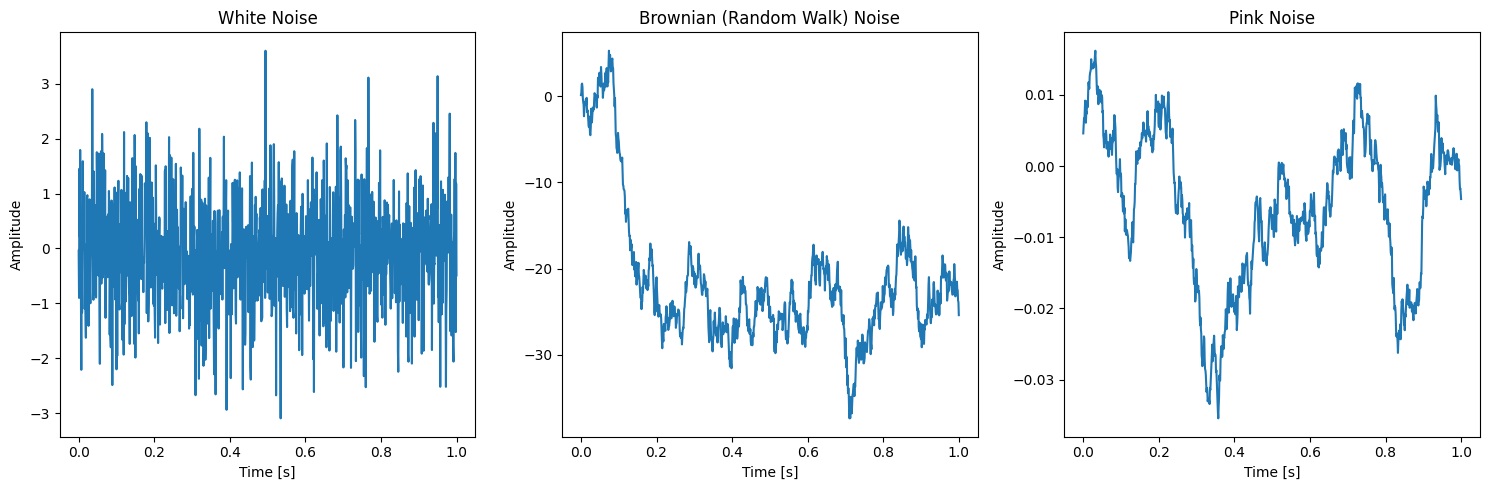

In [40]:
# Parameters
fs = 1000  # Sampling frequency
duration = 1  # seconds
t = np.linspace(0, duration, fs*duration)  # time vector

# Generate white noise
white_noise = np.random.normal(0, 1, size=fs*duration)

# Generate Brownian noise (random walk)
brownian_noise = np.cumsum(np.random.normal(0, 1, size=fs*duration))

# Generate pink noise
pink_noise = np.convolve(white_noise, np.ones((fs//10,))/fs, 'same')

# Plotting
plt.figure(figsize=(15, 5))

# White noise
plt.subplot(1, 3, 1)
plt.plot(t, white_noise)
plt.title('White Noise')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Brownian noise
plt.subplot(1, 3, 2)
plt.plot(t, brownian_noise)
plt.title('Brownian (Random Walk) Noise')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Pink noise
plt.subplot(1, 3, 3)
plt.plot(t, pink_noise)
plt.title('Pink Noise')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()